# 🎯 Mục tiêu dự án với tập dữ liệu Amazon Sale Report
## 🔍 1. Mục tiêu tổng quát
Khai phá dữ liệu bán hàng để phát hiện các yếu tố ảnh hưởng đến trạng thái đơn hàng, doanh thu và hiệu suất giao hàng.

Dự đoán kết quả trong tương lai như: đơn hàng có bị hủy hay không, hoặc doanh thu của một đơn hàng.

Đề xuất giải pháp cải thiện hoạt động kinh doanh: tối ưu hóa vận chuyển, giảm đơn hàng bị hủy, tăng doanh thu.

## 🧩 2. Các câu hỏi nghiên cứu có thể đặt ra


📊 Phân tích mô tả	
- Sản phẩm nào bán chạy nhất?
- Thành phố nào có doanh số cao nhất?
- Tỷ lệ đơn hàng bị hủy là bao nhiêu?
- Những yếu tố nào thường xuất hiện trong các đơn bị hủy?

📈 Hồi quy	
- Những yếu tố nào ảnh hưởng đến doanh thu (Amount)?
- Có thể dự đoán doanh thu của một đơn hàng dựa trên sản phẩm, khu vực, kiểu giao hàng...?

🧠 Phân loại	
- Đơn hàng này có bị hủy (Cancelled) không?
- Mô hình có thể phân loại trạng thái đơn hàng dựa trên thông tin đầu vào như thành phố, SKU, dịch vụ vận chuyển...?


## 🧪 3. Mục đích xây dựng mô hình
✅ Hồi quy (Regression)	Dự đoán số tiền (Amount) của một đơn hàng dựa trên các đặc trưng như loại hàng, thành phố, dịch vụ vận chuyển

✅ Phân loại (Classification)	Phân loại trạng thái đơn hàng: Shipped, Delivered, Cancelled, v.v.


# Triển Khai

### Đọc và xem dữ liệu

In [271]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("Amazon Sale Report.csv")

# Xem kích thước và 5 dòng đầu tiên
print("🔹 Kích thước dữ liệu:", df.shape)
display(df.head())

# Xem thông tin tổng quan về kiểu dữ liệu và giá trị thiếu
print("\n🔍 Thông tin các cột:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
display(df_info)


🔹 Kích thước dữ liệu: (128975, 24)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\2360503588.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN



🔍 Thông tin các cột:


,Data Type,Missing Values,Unique Values
index,int64,0,128975
Order ID,object,0,120378
Date,object,0,91
Status,object,0,13
Fulfilment,object,0,2
Sales Channel,object,0,2
ship-service-level,object,0,2
Style,object,0,1377
SKU,object,0,7195
Category,object,0,9


In [272]:
# Tạo bảng mô tả thuộc tính
column_descriptions = {
    'Order ID': 'Mã đơn hàng duy nhất',
    'Date': 'Ngày tạo đơn hàng',
    'Status': 'Trạng thái đơn hàng (Shipped, Cancelled, Delivered, ...)',
    'Fulfilment': 'Hình thức hoàn tất đơn hàng (Merchant hoặc Amazon)',
    'Sales Channel': 'Kênh bán hàng (Online, Offline)',
    'Ship Service Level': 'Mức độ dịch vụ vận chuyển (Standard, Express, ...)',
    'Style': 'Loại sản phẩm hoặc biến thể',
    'SKU': 'Mã định danh sản phẩm',
    'Category': 'Danh mục sản phẩm',
    'Size': 'Kích thước sản phẩm',
    'ASIN': 'Mã định danh sản phẩm trên Amazon',
    'Courier Status': 'Trạng thái của đơn vị vận chuyển (Shipped, Delivered, Cancelled)',
    'Qty': 'Số lượng mua',
    'Currency': 'Loại tiền tệ',
    'Amount': 'Tổng số tiền của đơn hàng',
    'ship-city': 'Thành phố nhận hàng',
    'ship-state': 'Bang hoặc khu vực nhận hàng',
    'ship-postal-code': 'Mã bưu điện nơi nhận',
    'ship-country': 'Quốc gia nhận',
    'promotion-ids': 'Mã khuyến mãi nếu có',
    'B2B': 'Đơn hàng B2B (doanh nghiệp) hay B2C',
    'fulfilled-by': 'Đơn vị hoàn tất đơn (Merchant hoặc Amazon)',
    'Unnamed: 22': 'Cột rác từ Excel, không có thông tin'
}

# Chuyển sang DataFrame để dễ đọc
desc_df = pd.DataFrame.from_dict(column_descriptions, orient='index', columns=['Description'])
display(desc_df)


,Description
Order ID,Mã đơn hàng duy nhất
Date,Ngày tạo đơn hàng
Status,"Trạng thái đơn hàng (Shipped, Cancelled, Deliv..."
Fulfilment,Hình thức hoàn tất đơn hàng (Merchant hoặc Ama...
Sales Channel,"Kênh bán hàng (Online, Offline)"
Ship Service Level,"Mức độ dịch vụ vận chuyển (Standard, Express, ..."
Style,Loại sản phẩm hoặc biến thể
SKU,Mã định danh sản phẩm
Category,Danh mục sản phẩm
Size,Kích thước sản phẩm


## ✅ Tiền xử lý dữ liệu (Data Preprocessing)


### 📘 1. Xoá cột dư thừa
Các cột như index, Unnamed: 22 không mang thông tin hữu ích (có thể do lỗi xuất file từ Excel).

In [273]:
# Xoá các cột không cần thiết
df.drop(columns=['index', 'Unnamed: 22','Courier Status'], errors='ignore', inplace=True)


### 📘 2. Chuyển đổi kiểu dữ liệu
- Một số cột như Date đang ở dạng chuỗi, cần chuyển sang datetime để phân tích thời gian.

- ship-postal-code đang ở dạng float, nên chuyển về string để thể hiện mã vùng rõ ràng.

In [274]:
# Chuyển 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Chuyển 'ship-postal-code' thành chuỗi (nếu có)
if 'ship-postal-code' in df.columns:
    df['ship-postal-code'] = df['ship-postal-code'].astype('Int64').astype('string')


### 📘 3. Chuẩn hoá giá trị thiếu (Missing Values)
- Nhiều mô hình học máy không xử lý được dữ liệu thiếu (NaN).

- Loại bỏ cột có quá nhiều giá trị thiếu

- Cột phân loại → thay thế bằng giá trị phổ biến hoặc 'Unknown'

- Cột số → thay thế bằng 0 hoặc trung bình

In [275]:
# Hiển thị tổng số giá trị thiếu
print("🔍 Thiếu dữ liệu:")
display(df.isnull().sum())

# Loại bỏ cột có hơn 60% giá trị thiếu
df = df.dropna(axis=1, thresh=len(df) * 0.4)

# Điền giá trị thiếu có định hướng
fill_defaults = {
    'Courier Status': 'Unknown',
    'currency': 'INR',
    'Amount': 0,
    'ship-postal-code' : '0'
}

for col, value in fill_defaults.items():
    if col in df.columns:
        df[col].fillna(value, inplace=True)
display(df.isnull().sum())


🔍 Thiếu dữ liệu:


Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\1812634595.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value, inplace=True)


Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               33
ship-postal-code          0
ship-country             33
promotion-ids         49153
B2B                       0
dtype: int64

### 📘 4. Xử lý trùng lặp
- Trùng lặp dòng có thể làm sai lệch phân tích, đặc biệt khi tính tổng doanh thu hoặc số đơn hàng.

In [276]:
# Kiểm tra và xoá dòng trùng lặp
print("🔁 Số dòng trùng lặp:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


🔁 Số dòng trùng lặp: 6


### 📘 5. Kiểm tra & mã hóa dữ liệu phân loại (Categorical Encoding - nếu dùng mô hình)
Các mô hình ML cần đầu vào số (numeric)

Các cột như Status, Fulfilment, Category, ... cần được mã hoá

In [277]:
# Kiểm tra các cột phân loại
cat_columns = df.select_dtypes(include='object').columns
print("🧾 Các cột phân loại:\n", cat_columns.tolist())


🧾 Các cột phân loại:
 ['Order ID', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids']


## 📊 Exploratory Data Analysis (EDA) & Trực quan hóa


### Đơn hàng bị hủy có đặc điểm gì?
🔍 Mục đích:
So sánh giữa đơn hàng Cancelled và không bị huỷ theo các yếu tố như Amount, ship-state, Courier Status.

### 📈 Phân phối số đơn hàng bị huỷ theo bang:



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\3642839011.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_by_state.values, y=cancelled_by_state.index, palette='Reds')
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


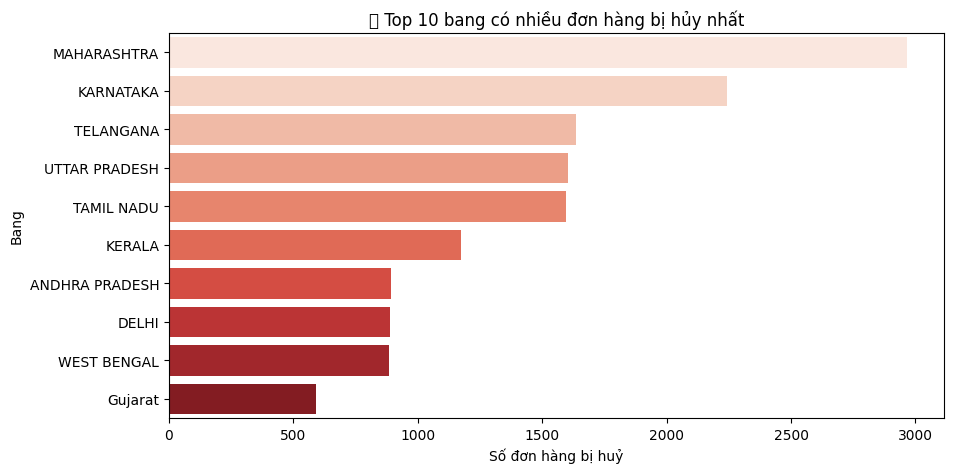

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
cancelled_by_state = df[df['Status'] == 'Cancelled']['ship-state'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=cancelled_by_state.values, y=cancelled_by_state.index, palette='Reds')
plt.title('🛑 Top 10 bang có nhiều đơn hàng bị hủy nhất')
plt.xlabel('Số đơn hàng bị huỷ')
plt.ylabel('Bang')
plt.show()


### 📈 So sánh doanh thu giữa đơn huỷ và không huỷ:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\3878918944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Amount'] > 0], x='Status', y='Amount', palette='pastel')
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


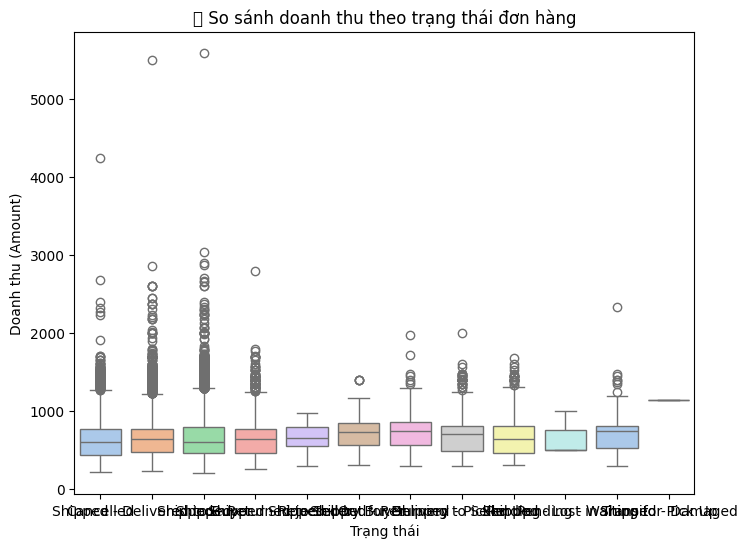

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['Amount'] > 0], x='Status', y='Amount', palette='pastel')
plt.title('💸 So sánh doanh thu theo trạng thái đơn hàng')
plt.ylabel('Doanh thu (Amount)')
plt.xlabel('Trạng thái')
plt.show()


### Doanh thu theo thời gian như thế nào?

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


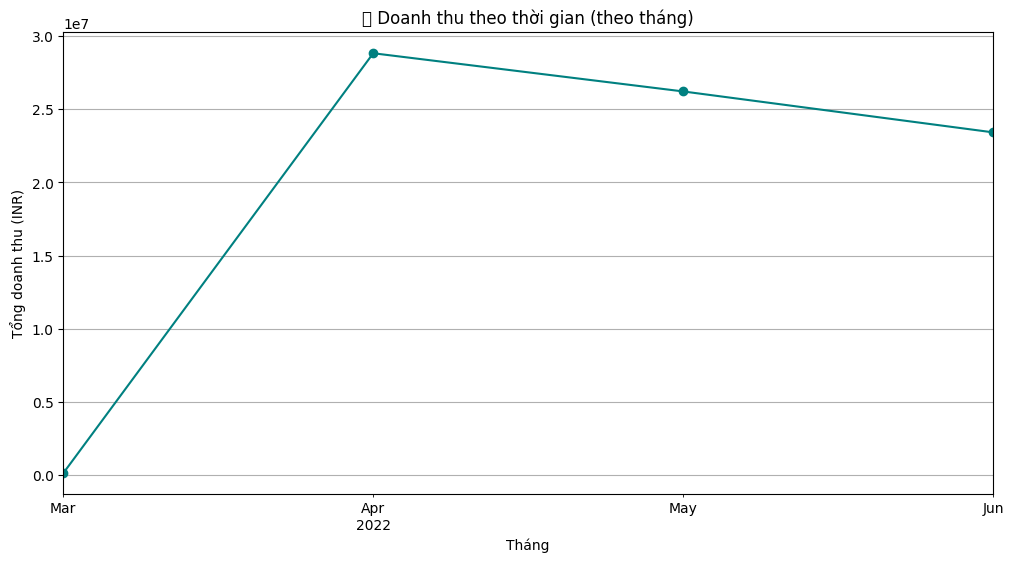

In [280]:
# Thêm cột tháng-năm
df['Month'] = df['Date'].dt.to_period('M')

revenue_by_month = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(12, 6))
revenue_by_month.plot(marker='o', color='teal')
plt.title('📅 Doanh thu theo thời gian (theo tháng)')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu (INR)')
plt.grid(True)
plt.show()


## 🧹 Xử lý dữ liệu đầu vào cho mô hình ML (Hồi quy & Phân loại)


### ✅ 1. Chọn biến mục tiêu (target) và loại mô hình


### 🎯 Xác định mục tiêu và bài toán

- **Mô hình phân loại:** Dự đoán đơn hàng có bị **huỷ (Status = "Cancelled")** hay không. Chuyển `Status` thành biến nhị phân 0/1.
- **Mô hình hồi quy:** Dự đoán **Amount** (doanh thu đơn hàng) dựa trên các đặc trưng như sản phẩm, khu vực, dịch vụ vận chuyển, v.v.


In [281]:
# Phân loại: Biến mục tiêu nhị phân
df['Cancelled'] = df['Status'].apply(lambda x: 1 if x == 'Cancelled' else 0)

# Hồi quy: Biến mục tiêu là Amount (đã làm sạch trước đó)


### ✅ 2. Lọc dữ liệu không hợp lệ


### 🔎 Lọc dữ liệu

- Bỏ các đơn hàng có `Amount <= 0` (lỗi nhập hoặc đơn không có giá trị).
- Chỉ giữ các dòng có `Qty > 0`.


In [282]:
df_model = df[(df['Amount'] > 0) & (df['Qty'] > 0)].copy()


### ✅ 3. Mã hoá biến phân loại (Categorical Encoding)


### 🔤 Mã hoá biến phân loại

- Sử dụng **Label Encoding** để biến các cột phân loại thành dạng số.
- Giúp mô hình ML hiểu và xử lý các biến phân loại.


In [283]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Tách các cột dạng chuỗi
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

# Khởi tạo bộ lưu encoder
label_encoders = {}
df_encoded = df_model.copy()

# Duyệt từng cột phân loại
for col in cat_cols:
    n_unique = df_model[col].nunique()
    
    if n_unique > 5:
        # Dùng Label Encoding
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le  # Lưu encoder nếu muốn inverse sau
    else:
        # Dùng One-Hot Encoding
        dummies = pd.get_dummies(df_model[col], prefix=col)
        df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)

# Kết quả
df_encoded.head()
df_model = df_encoded.copy()

### ✅ 4. Lựa chọn đặc trưng (Feature Selection)


### 🧠 Chọn đặc trưng đầu vào

- Giữ lại các cột quan trọng có thể ảnh hưởng đến đơn hàng như:
  - Thông tin sản phẩm: `Category`, `SKU`, `Style`, `Qty`
  - Thông tin giao hàng: `ship-city`, `ship-state`, `Courier Status`, `Ship Service Level`
  - Kênh bán: `Sales Channel`, `Fulfilment`
- Bỏ các cột ID (`Order ID`, `ASIN`) và thông tin trùng lặp (`fulfilled-by`, `currency`, `promotion-ids`)


In [284]:

#  Loại bỏ các cột không phù hợp
cols_to_drop = [
    'order-id', 'customer-name', 'ship-address', 'ship-city',
    'ship-phone-number', 'Date', 'Status', 'order-item-id', 'currency', 'Month','Courier Status'
]
df_model = df_model.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

df_model.head()

,Order ID,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-state,ship-postal-code,promotion-ids,B2B,Cancelled,Fulfilment_Amazon,Fulfilment_Merchant,Sales Channel _Amazon.in,ship-service-level_Expedited,ship-service-level_Standard,currency_INR,ship-country_IN
1,12251,844,4378,8,0,5217,1,406.0,22,560085,1999,False,0,False,True,True,False,True,True,True
2,40806,530,2588,8,8,666,1,329.0,27,410210,5705,True,0,True,False,True,True,False,True,True
4,81129,751,3781,6,0,4297,1,574.0,54,600073,5726,False,0,True,False,True,True,False,True,True
5,41828,1229,6199,5,8,2894,1,824.0,57,201102,5705,False,0,True,False,True,True,False,True,True
6,100455,180,647,5,5,1653,1,653.0,9,160036,5705,False,0,True,False,True,True,False,True,True


In [285]:
from imblearn.over_sampling import SMOTE

X = df_model.drop(columns=['Amount', 'Cancelled'], errors='ignore')
y_class = df_model['Cancelled']
y_reg = df_model['Amount']

#  Cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_class = smote.fit_resample(X, y_class)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [286]:
print(X.isna().sum())  # kiểm tra số lượng NaN theo cột


Order ID                        0
Style                           0
SKU                             0
Category                        0
Size                            0
ASIN                            0
Qty                             0
ship-state                      0
ship-postal-code                0
promotion-ids                   0
B2B                             0
Fulfilment_Amazon               0
Fulfilment_Merchant             0
Sales Channel _Amazon.in        0
ship-service-level_Expedited    0
ship-service-level_Standard     0
currency_INR                    0
ship-country_IN                 0
dtype: int64


### ✅ 5. Chuẩn hoá dữ liệu số (Feature Scaling)


### 📏 Chuẩn hoá dữ liệu số

- Các mô hình như hồi quy tuyến tính hoặc logistic thường yêu cầu dữ liệu ở cùng một thang đo.
- Dùng StandardScaler để chuẩn hoá các biến số.


In [287]:
print(X.head())

   Order ID  Style   SKU  Category  Size  ASIN  Qty  ship-state  \
1     12251    844  4378         8     0  5217    1          22   
2     40806    530  2588         8     8   666    1          27   
4     81129    751  3781         6     0  4297    1          54   
5     41828   1229  6199         5     8  2894    1          57   
6    100455    180   647         5     5  1653    1           9   

  ship-postal-code  promotion-ids    B2B  Fulfilment_Amazon  \
1           560085           1999  False              False   
2           410210           5705   True               True   
4           600073           5726  False               True   
5           201102           5705  False               True   
6           160036           5705  False               True   

   Fulfilment_Merchant  Sales Channel _Amazon.in  \
1                 True                      True   
2                False                      True   
4                False                      True   
5         

In [288]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled_reg = pd.DataFrame(X)

### ✅ 6. Chia tập huấn luyện và kiểm tra


In [289]:
from sklearn.model_selection import train_test_split

# Cho mô hình phân loại
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42)

# Cho mô hình hồi quy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled_reg, y_reg, test_size=0.2, random_state=42)


### 🤖 Mô hình phân loại: Logistic Regression

- Phù hợp cho bài toán nhị phân (Cancelled: 1 hoặc 0)
- Cho xác suất dự đoán → dễ diễn giải

**Tham số quan trọng:**
- `penalty='l2'`: chuẩn hóa L2 (mặc định) giúp giảm overfitting.
- `C=1.0`: hệ số điều chỉnh phạt regularization. Càng nhỏ thì regularization càng mạnh.
- `solver='liblinear'`: phù hợp với dữ liệu nhỏ và ít đặc trưng.
- `random_state=42`: để kết quả có thể tái lập được.


In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Huấn luyện Logistic Regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train_cls, y_train_cls)

# Dự đoán và đánh giá
y_pred_cls = logreg.predict(X_test_cls)
print("🔍 Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_cls))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     21594
           1       0.62      1.00      0.76     21634

    accuracy                           0.69     43228
   macro avg       0.81      0.69      0.66     43228
weighted avg       0.81      0.69      0.66     43228

📊 Confusion Matrix:
[[ 8206 13388]
 [   55 21579]]


c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 📈 Mô hình hồi quy: Linear Regression

- Dự đoán biến liên tục: `Amount`
- Dễ hiểu, nhanh huấn luyện, dễ diễn giải hệ số.

**Không cần nhiều tham số:** chỉ cần mặc định.


In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Huấn luyện mô hình hồi quy tuyến tính
linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)

# Dự đoán và đánh giá
y_pred_reg = linreg.predict(X_test_reg)

# Đánh giá kết quả
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"📉 MSE: {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


📉 MSE: 49462.69
📈 R² Score: 0.34


### 🔎 Mô hình phân loại: RandomForestClassifier

Mô hình rừng ngẫu nhiên là một tập hợp nhiều cây quyết định. Ưu điểm:
- Xử lý tốt dữ liệu phức tạp, không tuyến tính
- Kháng nhiễu và overfitting tốt hơn so với cây đơn

**Tham số được chọn:**
- `n_estimators=100`: Số lượng cây trong rừng. Giá trị mặc định tốt cho đa số trường hợp.
- `max_depth=10`: Giới hạn độ sâu của mỗi cây để tránh overfitting. Độ sâu nhỏ hơn giúp mô hình tổng quát hơn.
- `min_samples_split=10`: Chỉ chia node khi có ít nhất 10 mẫu. Giúp cây không phát triển quá mức.
- `random_state=42`: Đảm bảo tính lặp lại.


In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Mô hình phân loại
rf_cls = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

rf_cls.fit(X_train_cls, y_train_cls)
y_pred_rf_cls = rf_cls.predict(X_test_cls)

# Đánh giá
print("🌳 Random Forest Classifier Report:")
print(classification_report(y_test_cls, y_pred_rf_cls))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test_cls, y_pred_rf_cls))


🌳 Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     21594
           1       0.83      0.98      0.90     21634

    accuracy                           0.89     43228
   macro avg       0.90      0.89      0.89     43228
weighted avg       0.90      0.89      0.89     43228

📊 Confusion Matrix:
[[17094  4500]
 [  388 21246]]


### 🔎 Mô hình hồi quy: RandomForestRegressor

Rừng ngẫu nhiên hồi quy cũng là một tổ hợp nhiều cây quyết định, nhưng trả về trung bình kết quả dự đoán.

**Tham số được chọn:**
- `n_estimators=100`: Dùng 100 cây quyết định, tăng độ chính xác.
- `max_depth=15`: Hạn chế độ sâu để giảm overfitting.
- `min_samples_split=10`: Giúp cây không chia khi số lượng mẫu nhỏ.
- `random_state=42`: Đảm bảo kết quả có thể tái lập.


In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mô hình hồi quy
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42
)

rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

# Đánh giá
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"🌲 Random Forest Regressor - MSE: {mse_rf:.2f}")
print(f"🌲 Random Forest Regressor - R² Score: {r2_rf:.2f}")


🌲 Random Forest Regressor - MSE: 4650.22
🌲 Random Forest Regressor - R² Score: 0.94


### 🎯 ROC Curve và AUC Score

- **ROC (Receiver Operating Characteristic)** thể hiện sự đánh đổi giữa TPR (True Positive Rate) và FPR (False Positive Rate).
- **AUC (Area Under Curve)** là diện tích dưới đường ROC, đánh giá độ phân biệt của mô hình.
  - AUC ~ 1: mô hình tốt
  - AUC ~ 0.5: mô hình ngẫu nhiên


C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


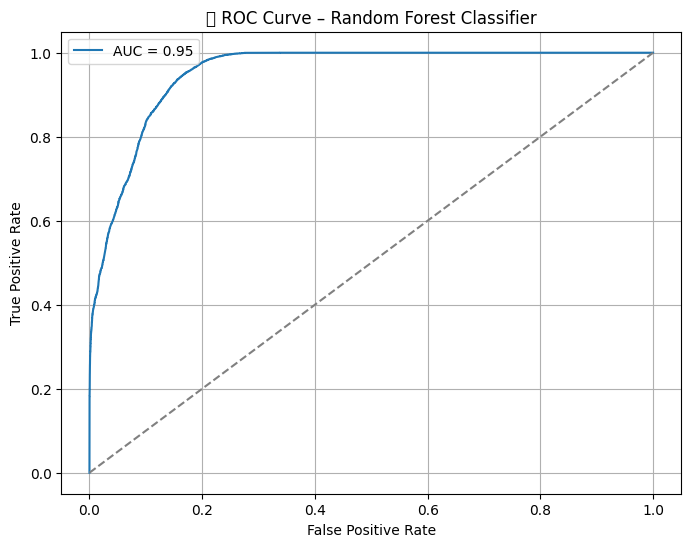

In [294]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất
y_proba_rf = rf_cls.predict_proba(X_test_cls)[:, 1]

# Tính ROC
fpr, tpr, thresholds = roc_curve(y_test_cls, y_proba_rf)
auc_score = roc_auc_score(y_test_cls, y_proba_rf)

# Vẽ ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🌳 ROC Curve – Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


### 🔍 Feature Importance

Random Forest cung cấp độ quan trọng của từng thuộc tính đầu vào:
- Đặc trưng càng quan trọng → càng ảnh hưởng đến dự đoán.
- Giúp chọn đặc trưng tốt, loại bỏ nhiễu.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\99954139.py:15: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


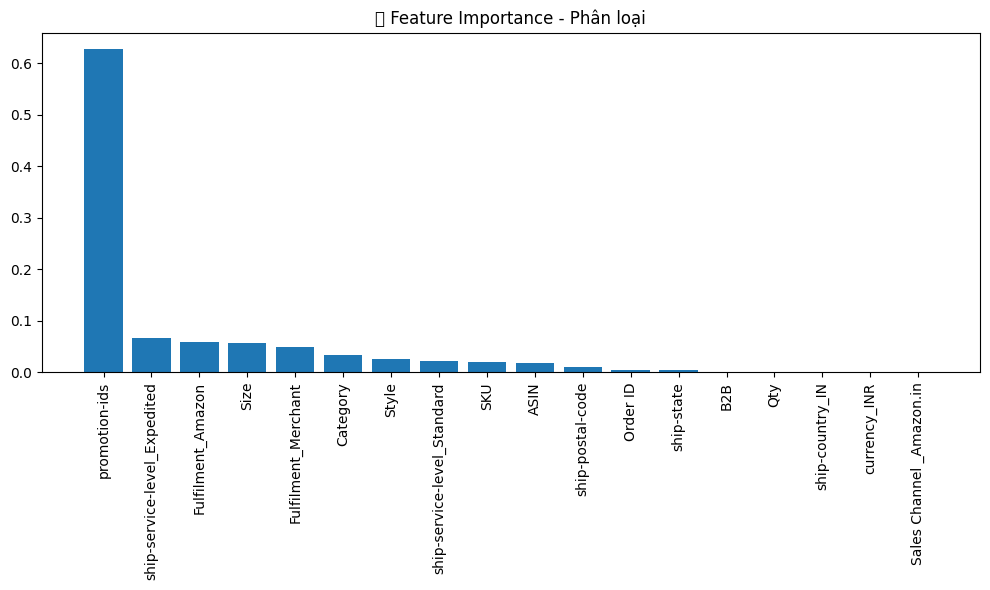

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21728\99954139.py:26: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


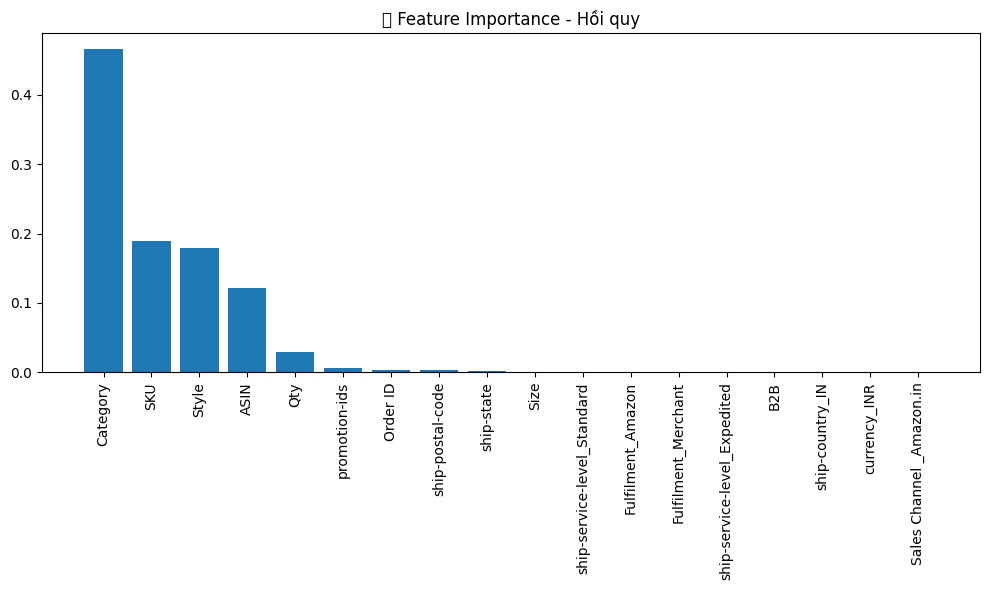

In [295]:
import pandas as pd
import numpy as np

# Feature names
feature_names = X.columns

# Phân loại - Feature Importance
importances_cls = rf_cls.feature_importances_
indices_cls = np.argsort(importances_cls)[::-1]

plt.figure(figsize=(10,6))
plt.title("🌳 Feature Importance - Phân loại")
plt.bar(range(len(importances_cls)), importances_cls[indices_cls], align='center')
plt.xticks(range(len(importances_cls)), feature_names[indices_cls], rotation=90)
plt.tight_layout()
plt.show()

# Hồi quy - Feature Importance
importances_reg = rf_reg.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]

plt.figure(figsize=(10,6))
plt.title("🌲 Feature Importance - Hồi quy")
plt.bar(range(len(importances_reg)), importances_reg[indices_reg], align='center')
plt.xticks(range(len(importances_reg)), feature_names[indices_reg], rotation=90)
plt.tight_layout()
plt.show()
